<h1> Blackbox Explanation Methods </h1>

<h2>Learning Objectives:</h2>

- Gain experience in implementing and using blackbox algorithm explanation techniques
- To investigate gaining insights into blackbox decision making algorithms 
- To critically appraise varied techniques in their use and limitations in explaining blackbox algorithms

<h3>Blackbox Inspection Techniques - Global Explanations:</h3>

Focus on two global explanation methods to understand the influence of each input feature on the the outcome. These are explanations based on a blackbox inspection technique [1].

- Permutation Importance [2]
- Partial Differential Plots


[1] R. Guidotti, A. Monreale, S. Ruggieri, F. Turini, D. Pedreschi, and F. Giannotti, “A Survey Of Methods For Explaining Black Box Models,” ACM Comput. Surv., Feb. 2018. https://dl.acm.org/doi/10.1145/3236009
    
[2] A. Fisher, C. Rudin, and F. Dominici, “All models are wrong, but many are useful: Learning a variable’s importance by studying an entire class of prediction models simultaneously,” J. Mach. Learn. Res., vol. 20, no. Vi, 2019. https://arxiv.org/abs/1801.01489

In [1]:
import sys
import os
from platform import python_version 

print('Python version:', python_version()) # print the version of python the script is using
print('Python path:', sys.executable) # print the path for the python executable the script is using
print('Working Directory:', os.getcwd()) # print the current working directory    

#------------- Load in some helpful packages -------------------------

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # randomly split data into test and train
from sklearn.ensemble import RandomForestClassifier # import classifier from sklearn 
from sklearn.neural_network import MLPClassifier  # import classifier from sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
 

Python version: 3.11.5
Python path: c:\Users\hgnis\anaconda3\python.exe
Working Directory: d:\ProgrammingSpaceMain\abuses-biases-in-dataTEMP\Global Blackbox Explainations Lab


<h1>1. Building ML Models</h1>

Building a number of different ML models that are able to predict someone chances of survival on the titanic, using the famous Titanic data set from the seminal Kaggle competition.


## 1.1 Load and View the Data

- `DataFrame.shape` [Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)
- `DataFrame.head` [Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)
- `DataFrame.tail` [Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html)

In [2]:
data = pd.read_csv(os.getcwd() + "/titanicData/train.csv")  #1.  reads the csv file into DataFrame

# 1. print number of rows and columns
print(f'Number of rows and columns in the data: {data.shape}')

# 2. view top rows of the data set
data.head()

Number of rows and columns in the data: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 3. view bottom rows of the data set
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<h2>1.2 Orginaise & Clean Data</h2>

- convert categorical data into numerical representations
- remove rows with $nan$ or $inf$ values.

In [4]:
# changing the categorical categorical data into numeric values for learning 
data.Sex = pd.Categorical(data.Sex)
data['Sex_code'] = data.Sex.cat.codes
data.Embarked = pd.Categorical(data.Embarked)
data['Embarked_code'] = data.Embarked.cat.codes

# remove rows of data that where values are inf or nan
clean_data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['Age','Fare'])

#print number of rows and columns
print(f'Number of rows and columns in the data: {clean_data.shape}')

#view the bottom rows of the data
clean_data.tail()

Number of rows and columns in the data: (714, 14)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code,Embarked_code
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q,0,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C,1,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q,1,1


## 1.3 Create Test and Train Data Sets for Model Training

Create train and test data sets to train some ML models to predict survival of the titanic disaster.

In [5]:
y = clean_data['Survived']  # copying the target class into y

# create a list of input feature names X data, copy data into X
feature_names = [i for i in clean_data.columns if (clean_data[i].dtype in [np.int64, np.int8, np.float64] and (i != 'Survived'))]
X = clean_data[feature_names]

#1. split the data into train and evalution (test) sets
train_X, val_X, train_y, val_y = train_test_split(X, y, 
                                                  test_size=0.25,
                                                  random_state=1)

#2. print the list of fetures inlcuded in X.
print(f'feature_names {feature_names}')

#3. print the shapes of the test and train sets
print(f'train_X size {train_X.shape}')
print(f'val_X size {val_X.shape}')
print(f'train_y size {train_y.shape}')
print(f'val_y size {val_y.shape}')

#4. print the values of the test and train sets
print(f'\nTrain set \n{train_X.head()}')
print(f'\nTest set \n{val_X.head()}')
print(f'\nTrain labels \n{train_y.head()}')
print(f'\nTest labels\n{val_y.head()}')

feature_names ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_code', 'Embarked_code']
train_X size (535, 8)
val_X size (179, 8)
train_y size (535,)
val_y size (179,)

Train set 
     PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_code  Embarked_code
813          814       3   6.0      4      2  31.2750         0              2
448          449       3   5.0      2      1  19.2583         0              0
145          146       2  19.0      1      1  36.7500         1              2
880          881       2  25.0      0      1  26.0000         0              2
310          311       1  24.0      0      0  83.1583         0              0

Test set 
     PassengerId  Pclass   Age  SibSp  Parch      Fare  Sex_code  \
689          690       1  15.0      0      1  211.3375         0   
278          279       3   7.0      4      1   29.1250         1   
506          507       2  33.0      0      2   26.0000         0   
9             10       2  14.0      1      0   30

In [6]:
#train transparent box model
Tree_model = tree.DecisionTreeClassifier(max_depth=5).fit(train_X, train_y)

#predict test data labels using transparent box model
Tree_pred_val_y = Tree_model.predict(val_X)

#1. Train black box models
BB1_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1).fit(train_X, train_y)
BB2_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=1).fit(train_X, train_y)

#2. create predicition lables for each model
BB1_pred_val_y = BB1_model.predict(val_X)
BB2_pred_val_y = BB2_model.predict(val_X)


<h2>1.3 Performance Measurement </h2>

$$ Accuracy = \frac{CorrectPredictions}{TotalPredictions} = \frac{TP + TN}{TotalPredictions}$$

$$Precision = \frac{\sum TruePositive}{\sum PredictedConditionPositive} = \frac{TP}{TP + FP}$$

$$Recall = \frac{\sum TruePositive}{\sum ConditionPositive} = \frac{TP}{TP + FN}$$

$$F1 = \frac{2 \cdot Precision\cdot Recall}{Precision + Recall}$$



Tree accuracy = 0.8547486033519553
Tree f1 score = 0.803030303030303

Black box model 1, accuracy = 0.8770949720670391
Black box model 1, f1 score = 0.8166666666666667

Black box model 2, accuracy = 0.7597765363128491
Black box model 2, f1 score = 0.6055045871559633


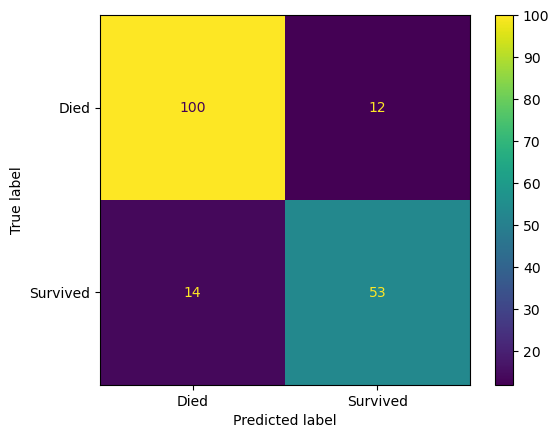

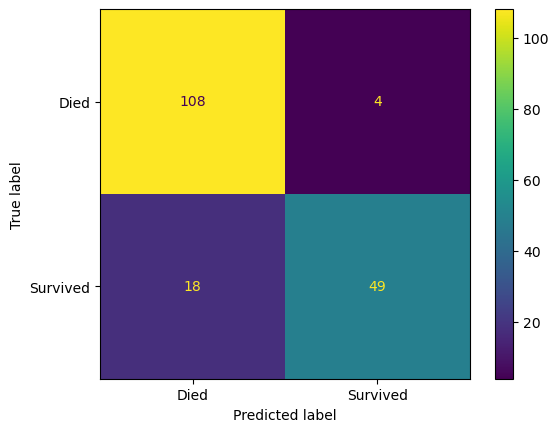

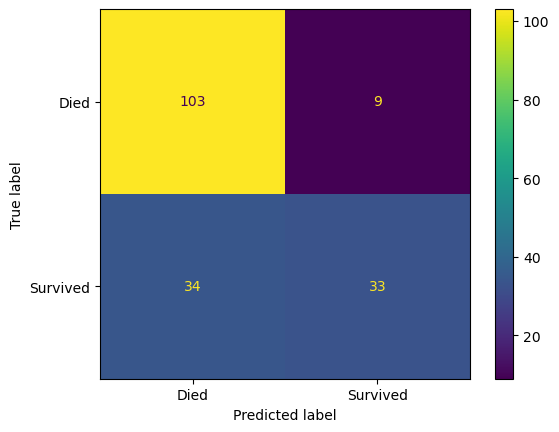

In [7]:
###### import metrics from sklearn ###################
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import recall
#from sklearn.metrics import precision

Tree_acc = accuracy_score(val_y, Tree_pred_val_y)
Tree_f1 = f1_score(val_y, Tree_pred_val_y)
print(f'\nTree accuracy = {Tree_acc}')
print(f'Tree f1 score = {Tree_f1}')
cm = confusion_matrix(val_y, Tree_pred_val_y)
ConfusionMatrixDisplay(cm, display_labels=['Died', 'Survived']).plot()


#1. calculate & preint performce score for BB1
BB1_acc = accuracy_score(val_y, BB1_pred_val_y)
BB1_f1 = f1_score(val_y, BB1_pred_val_y)
print(f'\nBlack box model 1, accuracy = {BB1_acc}')
print(f'Black box model 1, f1 score = {BB1_f1}')
cm2 = confusion_matrix(val_y, BB1_pred_val_y)
ConfusionMatrixDisplay(cm2, display_labels=['Died', 'Survived']).plot()


#2. calculate & print performce score for BB2
BB2_acc = accuracy_score(val_y, BB2_pred_val_y)
BB2_f1 = f1_score(val_y, BB2_pred_val_y)
print(f'\nBlack box model 2, accuracy = {BB2_acc}')
print(f'Black box model 2, f1 score = {BB2_f1}')
cm3 = confusion_matrix(val_y, BB2_pred_val_y)   
ConfusionMatrixDisplay(cm3, display_labels=['Died', 'Survived']).plot()


<h1>2. Model (Decision) Explanation</h1>

Evaluate the model and reason why the model is making its predictions. Two methods:

- Permutation Importance
- Partial Differential Plots

## 2.1 Explanations for a Transparent Model

The explainable model (transparent box) used in here is a Decision Tree.
Since this is explainable - interrogate the model itself, for a Decision Trees, plot the tree and follow the reasoning.


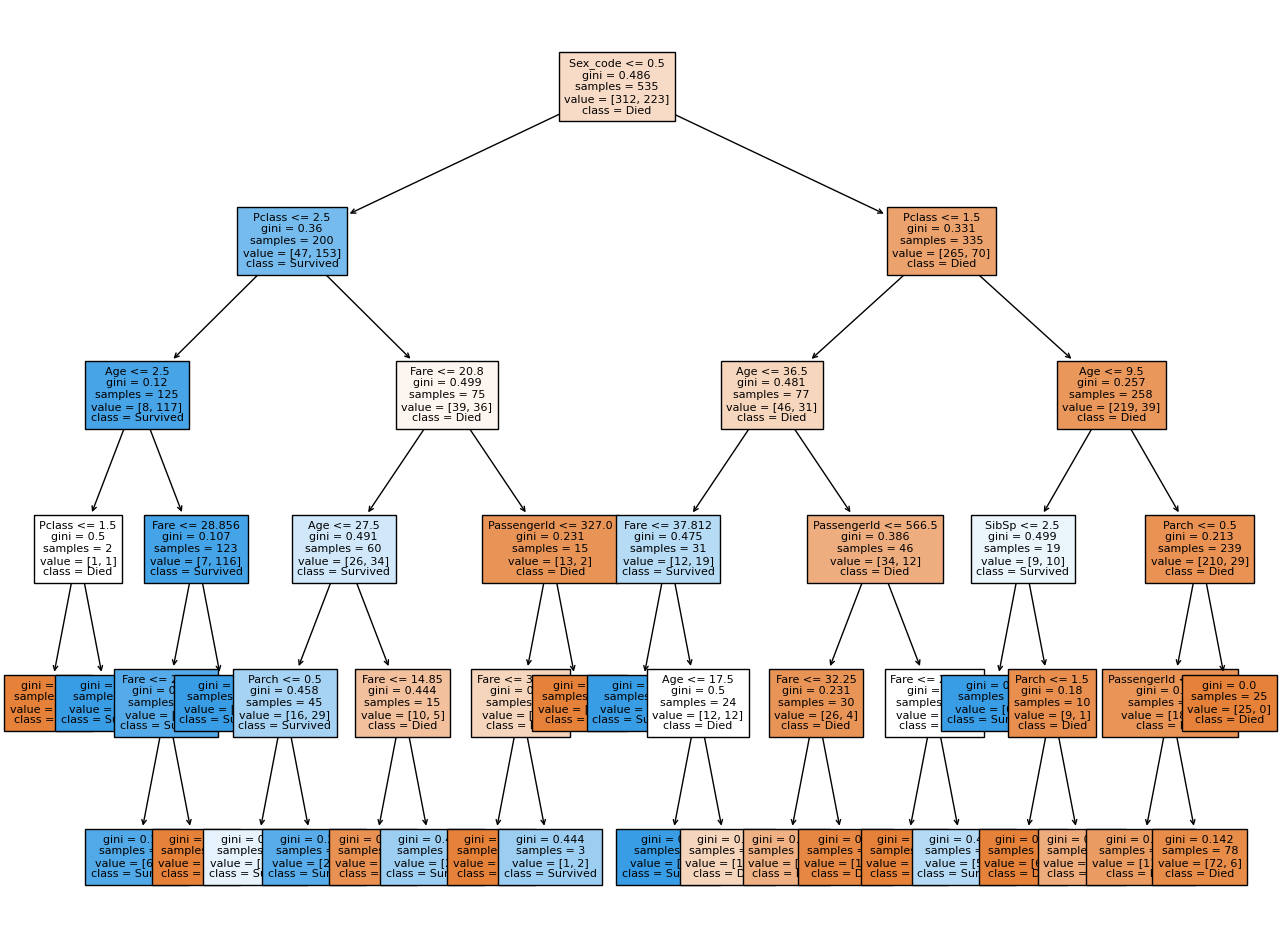

In [8]:
plt.figure(figsize=(16,12))
tree.plot_tree(Tree_model, class_names = ['Died','Survived'], feature_names = feature_names, fontsize=8, filled=True) 
plt.show()

## 2.2 Permutation Importance for Explanations </h3>

Experiment with Permutation Importance. This is a relatively simple way of measuring how much emphasis is placed (by the model) on any given variable to achieve accurate performance. i.e <em>What features have the biggest impact on prediction?</em> In this method is important to remember we do not care about how prediction algorithm works or change it in any way, it is treated as a black box [2]. 

<b>Algorithm</b>

The idea is the following: feature importance can be measured by looking at how much the score, $s$, (accuracy, F1, AUC, etc. - any score of interest) decreases when a feature is not available.

However, removing the feature will need a change to the model instead of removing a feature, $j$, replacing it with random noise i.e. feature column remains as an input, but it no longer contains useful information. Example the feature, $j$, 'Age' in the data. This method works if noise is drawn from the same distribution as original feature values (as otherwise estimator may fail). A simple way to achieve this is to simply randomly shuffle the values in one column and run the test to get the score, $s$, we repeat and average this result for each feature, $j$, hence for the importance, $i_j$, we get a weight (mean difference) and variance of the difference in the output.

[2] A. Fisher, C. Rudin, and F. Dominici, “All models are wrong, but many are useful: Learning a variable’s importance by studying an entire class of prediction models simultaneously,” J. Mach. Learn. Res., vol. 20, no. Vi, 2019.

### 2.2.1 Implementing Permutation Importance 

Implement function, `Permutation_Scores()`, that calculates the blue portion of the algorithm below. the following inputs are expected by the function: fitted predictive model $m$, tabular dataset (validation or training) $D$.


-  Compute the reference score $s$ (accuracy) of the model $m$ on data $D$.
  - <font color='blue'>For each feature $j$ (column of $D$):
    - For each repetition $k$ in $1,...,K$:
      - Randomly shuffle column $j$ of dataset $D$ to generate a corrupted version of the data named $D~_{k,j}$
      - Compute the score $s_{k,j}$ of model $m$ on corrupted data $D~_{k,j}$</font>
    - Compute importance $i_j$ for feature $f_j$ defined as:

    $$i_j = s - \frac{1}{K}\sum_{k=1}^{K} s_{k,j}$$


In [9]:
def Permutation_Scores(m, D, K):
    """
    A function that calculates feature importance for a range of input features, j, 
    for a given classificaiton model , m.
    
    Input:
    m - classification model
    D - DataFrame, oringal imput data (non perumtated).
    K - integer, the number or permutaions for each feature
    
    Output:
    s_ - numpy array (size: j,K) of scores (accuracy) for each feature, j, and perumtation, k.
    """
    
    # set-up some varibles for the loops 
    f = list(D.columns)     # list of feature names in test data 
    j_count = 0             # varible to count which feautre is being worked on
    
    
    ##1. create an array of zeros f rows (number of fetures) and K columns ( number of permutations)    
    s_ = np.zeros((len(f),K))
    
    #2. loop over each feature, f_j (columns in D)
    for j in f:      
        
        #3. loop to create multiple permutated feture columns for a given feature, f
        for k in range(K):    

            D_kj = D.copy()  # make a copy of the data set to shuffle the feature 

            #4. permutate the values in the column D realteing to feature j
            D_kj.loc[:,(j)] = np.random.permutation(D_kj[j].values)

            #5. make new prediction for test data D_j,k
            pred = m.predict(D_kj)
            
            #6. calcaute new score s_k,j
            s_[j_count,k] = accuracy_score(val_y, pred)
            
    
        j_count +=1
    #7. return array of scores
    return(s_)


In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=5).fit(train_X, train_y)
s_ = Permutation_Scores(model, val_X, 4)

model_pred_val_y = model.predict(val_X)
model_acc = accuracy_score(val_y, model_pred_val_y)

print(f'Shape of array {s_.shape}')
print(f'Values of s_\n{s_}')

Shape of array (8, 4)
Values of s_
[[0.84357542 0.8547486  0.8603352  0.84357542]
 [0.78212291 0.79329609 0.79888268 0.79888268]
 [0.81564246 0.80446927 0.79329609 0.81564246]
 [0.83798883 0.86592179 0.8547486  0.87709497]
 [0.87150838 0.87709497 0.8603352  0.87709497]
 [0.8547486  0.83240223 0.8547486  0.84357542]
 [0.67039106 0.76536313 0.68156425 0.67597765]
 [0.86592179 0.8603352  0.8547486  0.87150838]]


### 2.1.1 Cont ...

Calling `Permutation_Scores()` function

-  Compute the reference score $s$ (accuracy) of the model $m$ on data $D$.
  - For each feature $j$ (column of $D$):
    - For each repetition $k$ in $1,...,K$:
      - Randomly shuffle column $j$ of dataset $D$ to generate a corrupted version of the data named $D~_{k,j}$
      - Compute the score $s_{k,j}$ of model $m$ on corrupted data $D~_{k,j}$
    - <font color='blue'>Compute importance $i_j$ for feature $f_j$ defined as: </font>

<font color='blue'>$$i_j = s - \frac{1}{K}\sum_{k=1}^{K} s_{k,j}$$ </font>

<font color='blue'>$$\mu_{s_{k,j}} = \frac{1}{K}\sum_{k=1}^{K} s_{k,j}$$ </font>

<font color='blue'>$$ i_{\sigma,j} = \frac{1}{K}\sum_{k=1}^{K} (s_{k,j} - \mu_{s_{k,j}})^2 $$</font>


In [11]:
K = 100

#1. calc permunation scores using your function   
s_ = Permutation_Scores(model, val_X, K)

#2. set s to the score achived by the model on the original data 
s = accuracy_score(val_y, model_pred_val_y)

perm_list = []       # set an empty list to capture permutation importance
D_columns = list(val_X.columns) 

for f in range(len(D_columns)):   # loop over all features 
    
    #3. calculate avergae i for each feature , j
    i = s - np.mean(s_[f])
    var = np.var(s_[f])
    
    # save Permutation Importance to output list 
    feat = [D_columns[f], i, var]
    perm_list.append(feat)

# print the Permutation Importance for each feature in order of greatest to smallest i
perm_list.sort(key = lambda x: x[1], reverse=True)  
for row in perm_list:
    print(row)


['Sex_code', 0.18569832402234654, 0.0006361349520926315]
['Pclass', 0.08675977653631262, 0.0003098873318560596]
['Age', 0.06480446927374295, 0.0001554258606160854]
['Fare', 0.031955307262569566, 0.00013737398957585614]
['PassengerId', 0.0303910614525138, 0.00010256858400174793]
['Embarked_code', 0.01754189944134099, 9.738772198121148e-05]
['SibSp', 0.016759776536312887, 5.0560219718485583e-05]
['Parch', 0.010949720670391017, 5.737648637682954e-05]


### 2.2.2 Permutation Importance Library

In [12]:
######### import the libary that runs Permutation Importance ######
import eli5
from eli5.sklearn import PermutationImportance 

########## run Permutation Importance and print results ##########
Tree_perm = PermutationImportance(Tree_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(Tree_perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1922 ± 0.0378,Sex_code
0.1564 ± 0.0381,Pclass
0.1084 ± 0.0313,Age
0.0223 ± 0.0071,SibSp
0.0168 ± 0.0387,Fare
0.0156 ± 0.0179,PassengerId
0 ± 0.0000,Embarked_code
0 ± 0.0000,Parch


In [13]:

BB1_perm = PermutationImportance(BB1_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(BB1_perm, feature_names = val_X.columns.tolist())



Weight,Feature
0.1955 ± 0.0381,Sex_code
0.0860 ± 0.0279,Pclass
0.0648 ± 0.0313,Age
0.0335 ± 0.0234,Fare
0.0324 ± 0.0179,PassengerId
0.0179 ± 0.0217,Embarked_code
0.0156 ± 0.0084,Parch
0.0101 ± 0.0164,SibSp


In [14]:

BB2_perm = PermutationImportance(BB2_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(BB2_perm, feature_names = val_X.columns.tolist())


Weight,Feature
0.1207 ± 0.0350,Fare
0.0581 ± 0.0219,Sex_code
0.0190 ± 0.0167,SibSp
0.0134 ± 0.0114,Parch
0.0078 ± 0.0167,Embarked_code
0.0011 ± 0.0045,Pclass
-0.0078 ± 0.0270,PassengerId
-0.0134 ± 0.0152,Age


## 2.2 Partial Differential Plots

Partial Dependence Plots [3] are also calculated after a model has been fit, they offer more fidelity than Permutation  Importance, because they provide a distribution of the dependence of the model on a given variable as apposed to a mean and variance as is the case in Permutation Importance. 

<b>Algorithm</b>

In Partial Dependence Plots we set one feature ( in the example image above its 'Glucose') to a fixed value (for all entries) and note the change to the prediction score. Then we vary this fixed value from lowest to highest capturing the prediction score for each value. The change in the score is plotted (vertical axis) against the value (horizontal axis), this illustrates how the model responds to changes in this given variable.


[3] J. Krause, A. Perer, and K. Ng, “Interacting with Predictions,” in Proceedings of the 2016 CHI Conference on Human Factors in Computing Systems - CHI ’16, 2016, pp. 5686–5697.

<b>Implementation</b>

PDP library to implement - more documentation on the use of this library can be found [here](https://pdpbox.readthedocs.io/en/latest/#)


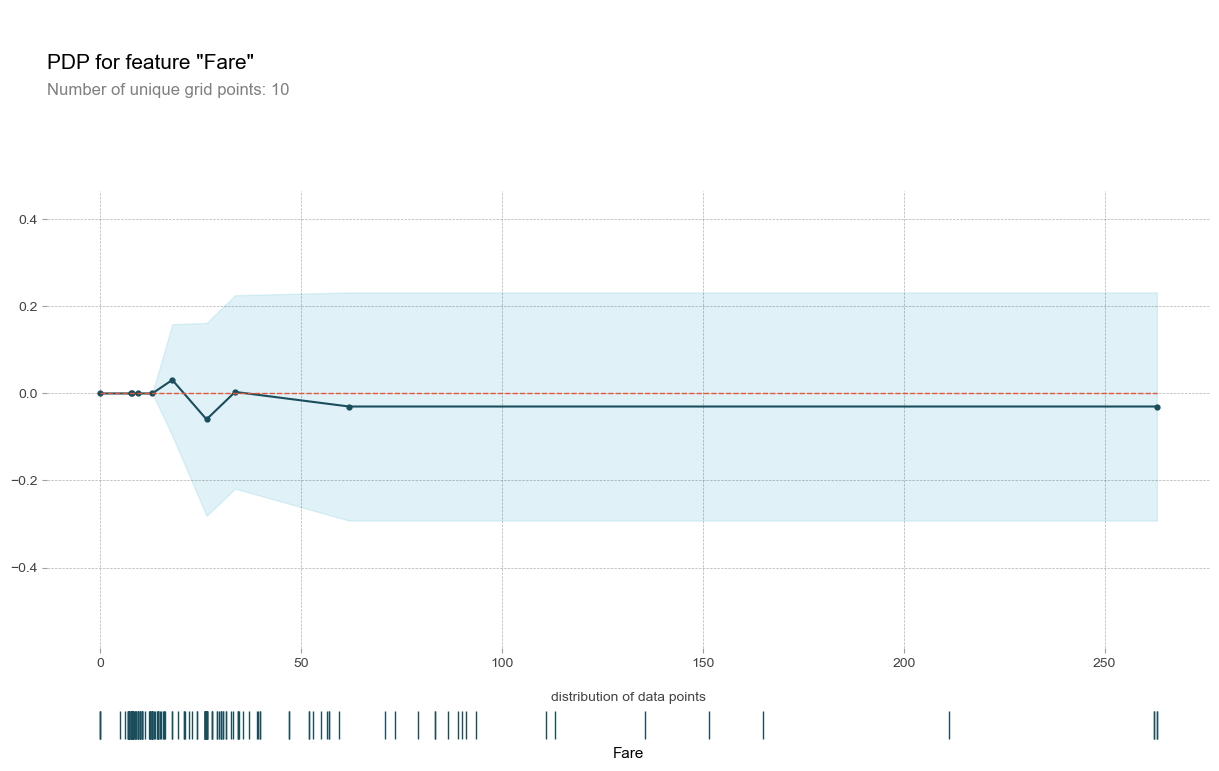

In [15]:
#import PDP library
from pdpbox import pdp

# Create the data to plot
pdp_Survive = pdp.pdp_isolate(model=Tree_model, dataset=val_X, model_features=feature_names, feature='Fare')

pdp.pdp_plot(pdp_Survive, 'Fare', plot_pts_dist=True)
plt.show()

#### For Tree model

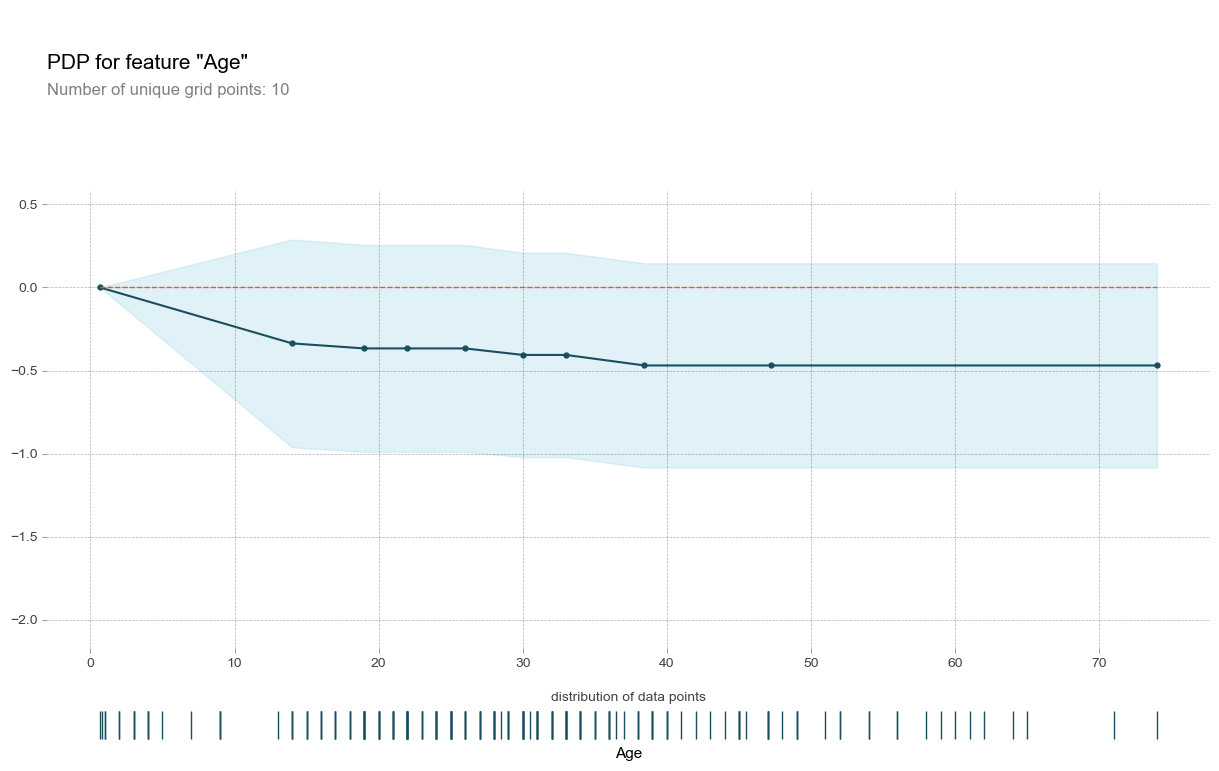

In [25]:
# Create the data that we will plot
pdp_Survive = pdp.pdp_isolate(model=Tree_model, dataset=val_X, model_features=feature_names, feature='Age')
# plot it
pdp.pdp_plot(pdp_Survive, 'Age', plot_pts_dist=True)
plt.show()


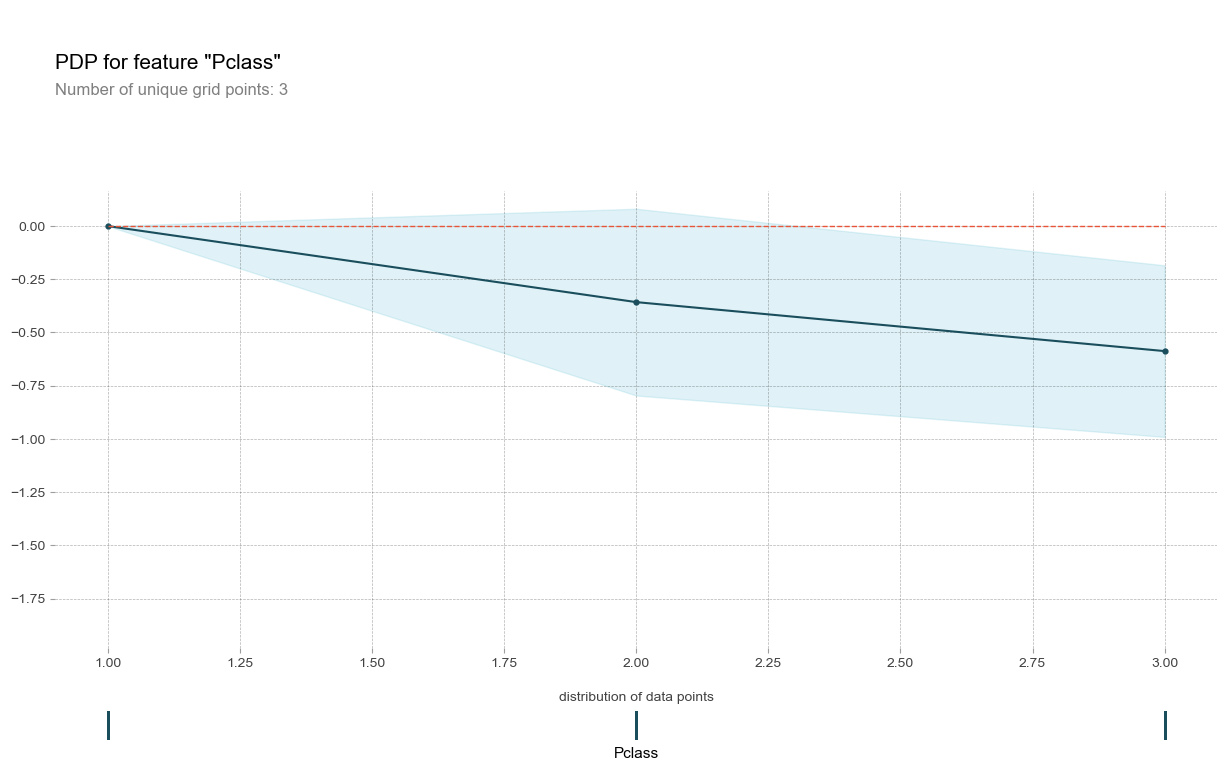

In [17]:
# Create the data that we will plot
pdp_Survive = pdp.pdp_isolate(model=Tree_model, dataset=val_X, model_features=feature_names, feature='Pclass')
# plot it
pdp.pdp_plot(pdp_Survive, 'Pclass', plot_pts_dist=True)
plt.show()


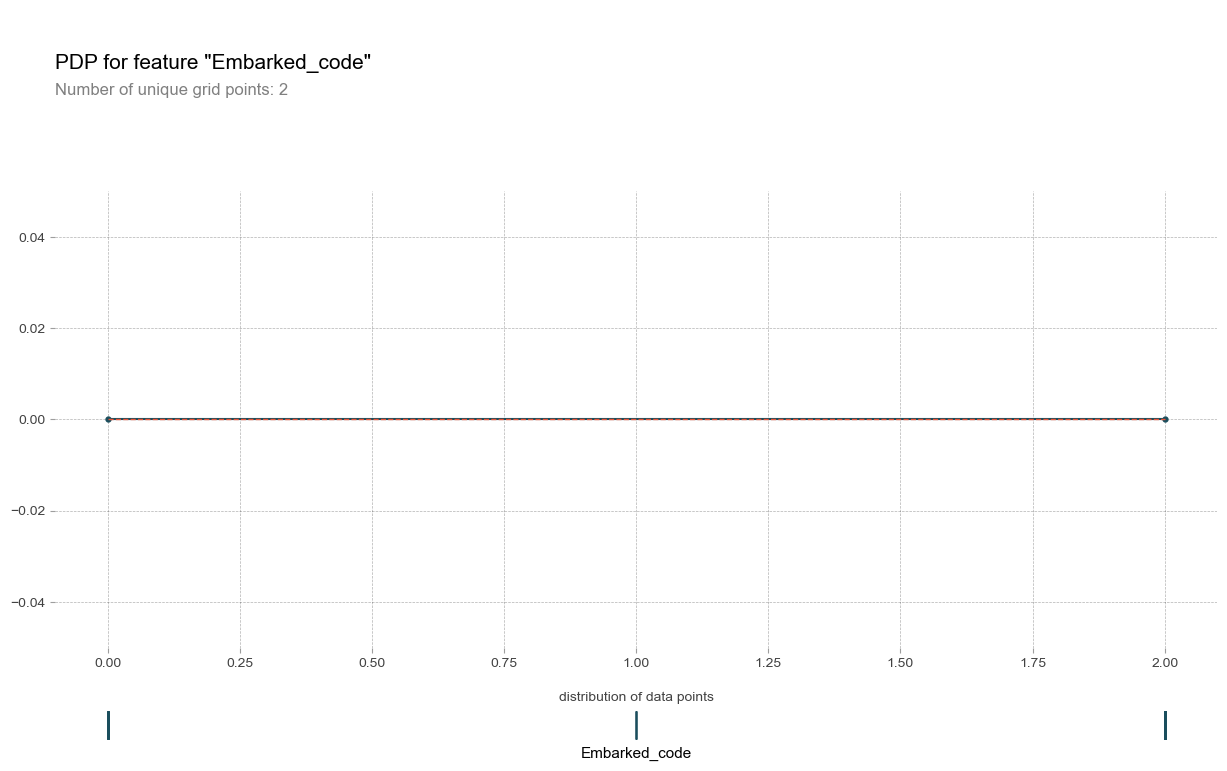

In [18]:
# Create the data that we will plot
pdp_Survive = pdp.pdp_isolate(model=Tree_model, dataset=val_X, model_features=feature_names, feature='Embarked_code')
# plot it
pdp.pdp_plot(pdp_Survive, 'Embarked_code', plot_pts_dist=True)
plt.show()


#### For blackbox model 1: RandomForest

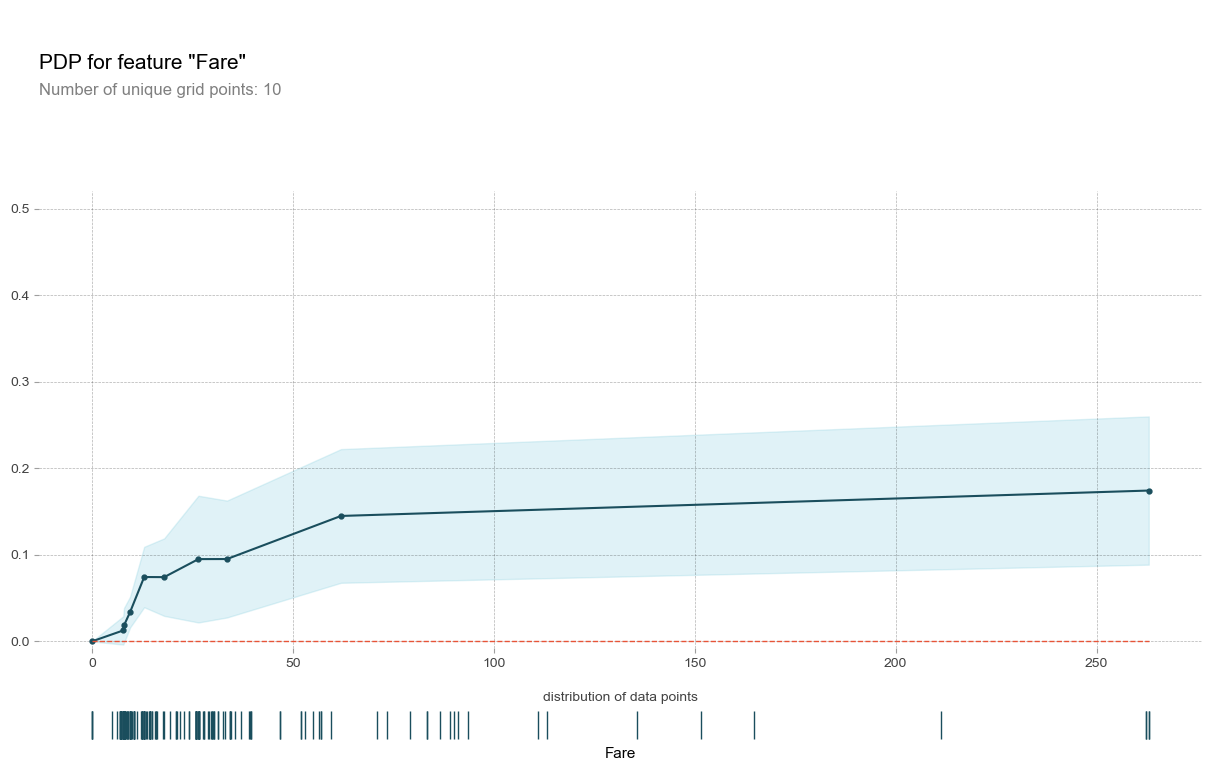

In [26]:
# Create the data that we will plot
pdp_Survive = pdp.pdp_isolate(model=BB1_model, dataset=val_X, model_features=feature_names, feature='Fare')
# plot it
pdp.pdp_plot(pdp_Survive, 'Fare', plot_pts_dist=True)
plt.show()


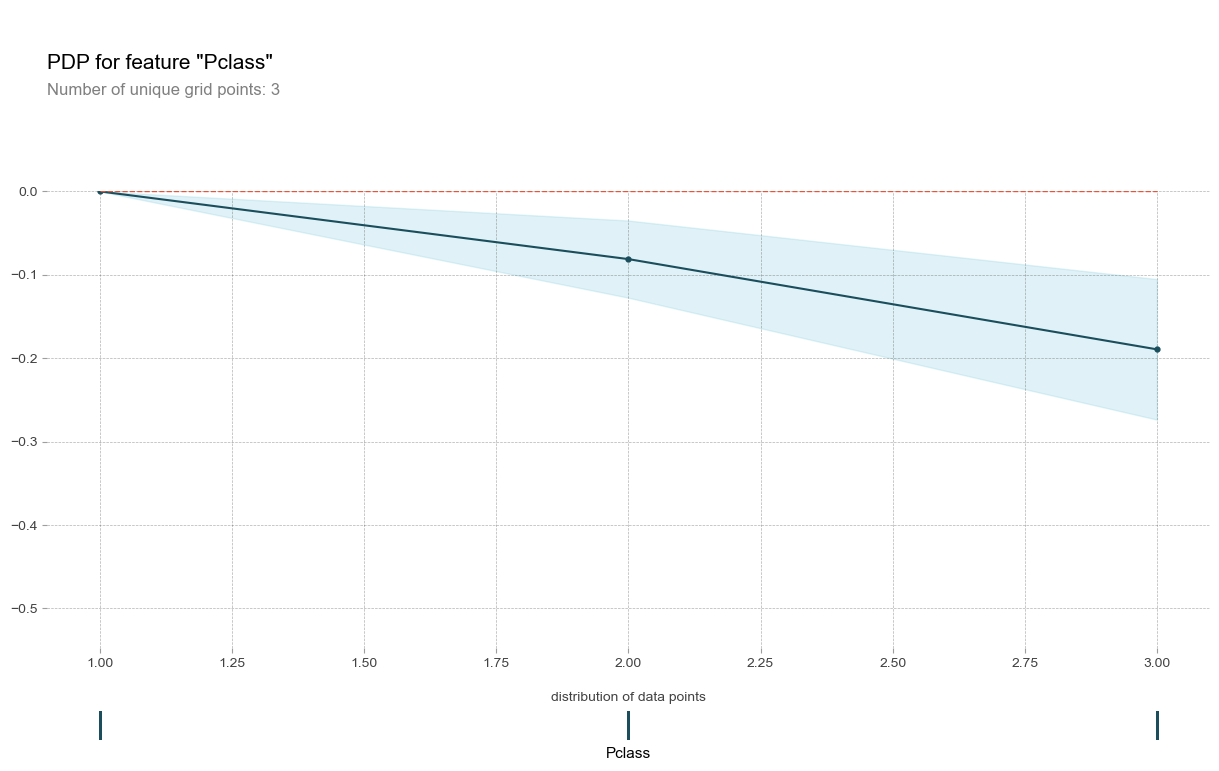

In [20]:
# Create the data that we will plot
pdp_Survive = pdp.pdp_isolate(model=BB1_model, dataset=val_X, model_features=feature_names, feature='Pclass')
# plot it
pdp.pdp_plot(pdp_Survive, 'Pclass', plot_pts_dist=True)
plt.show()


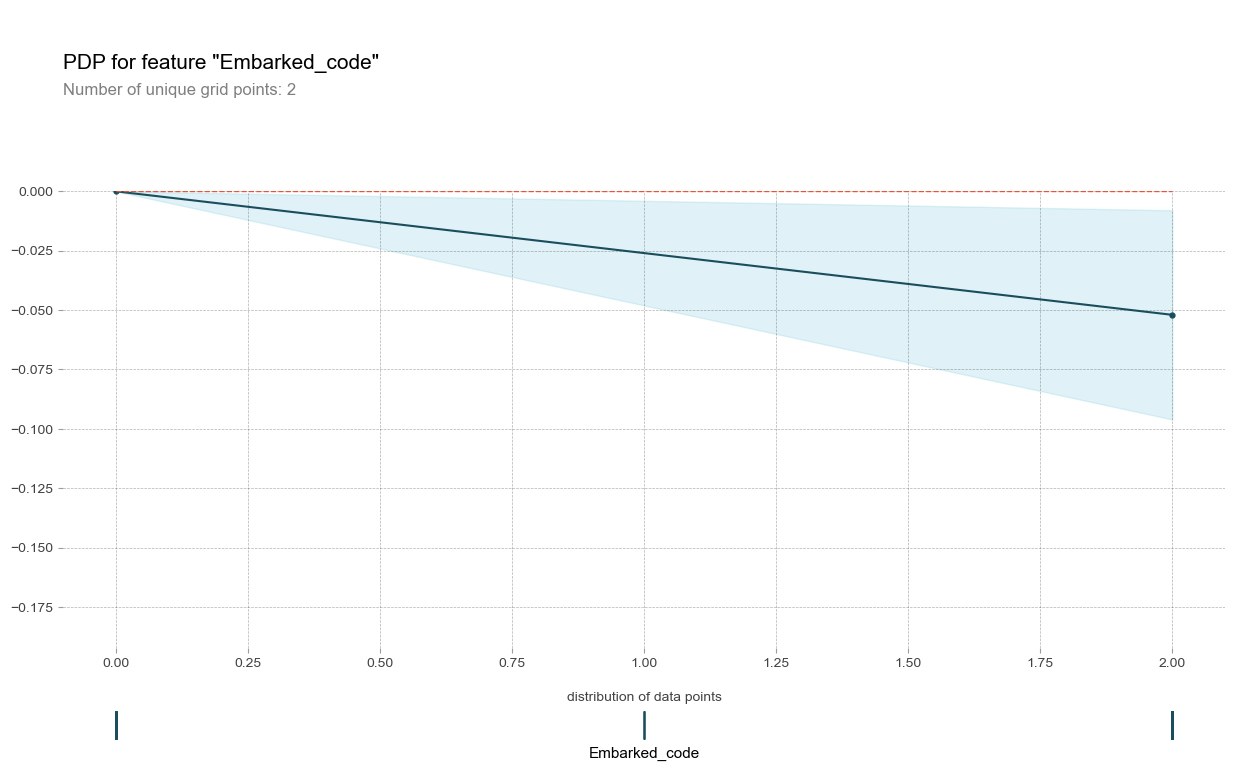

In [21]:
# Create the data that we will plot
pdp_Survive = pdp.pdp_isolate(model=BB1_model, dataset=val_X, model_features=feature_names, feature='Embarked_code')
# plot it
pdp.pdp_plot(pdp_Survive, 'Embarked_code', plot_pts_dist=True)
plt.show()


#### For blackbox model 2: MLP

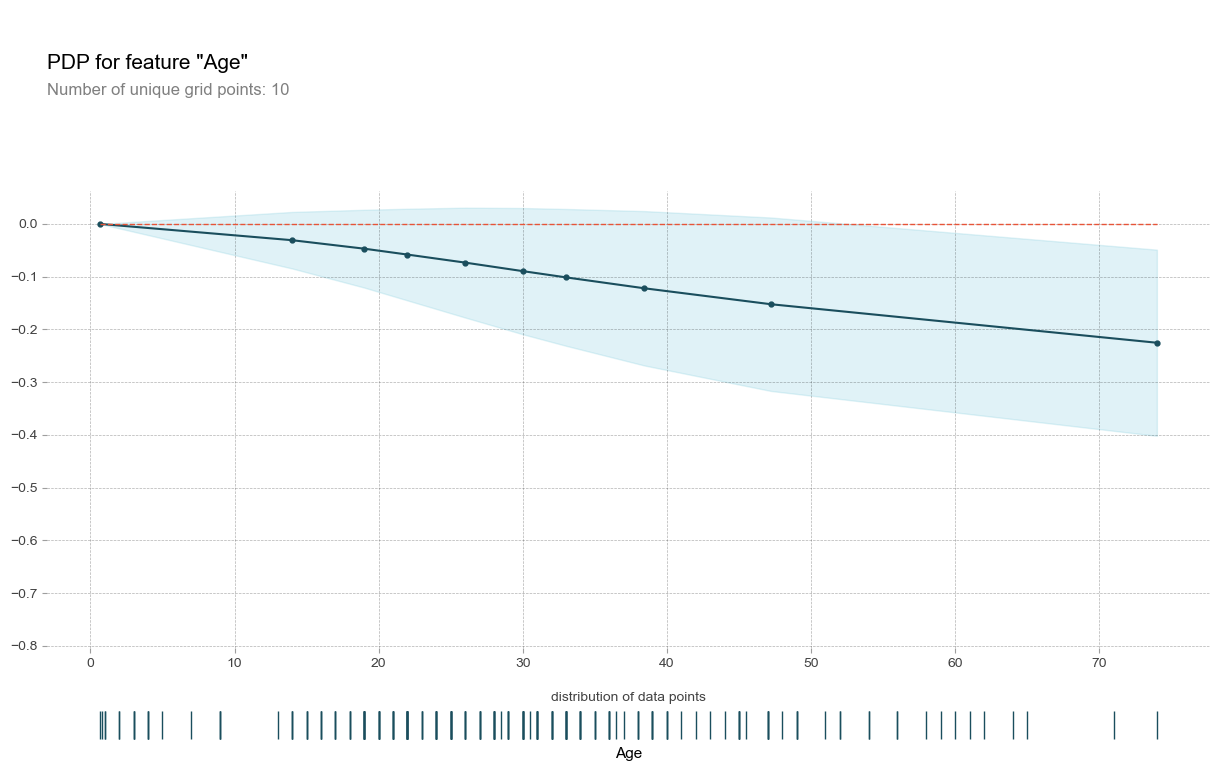

In [27]:
# Create the data that we will plot
pdp_Survive = pdp.pdp_isolate(model=BB2_model, dataset=val_X, model_features=feature_names, feature='Age')
# plot it
pdp.pdp_plot(pdp_Survive, 'Age', plot_pts_dist=True)
plt.show()


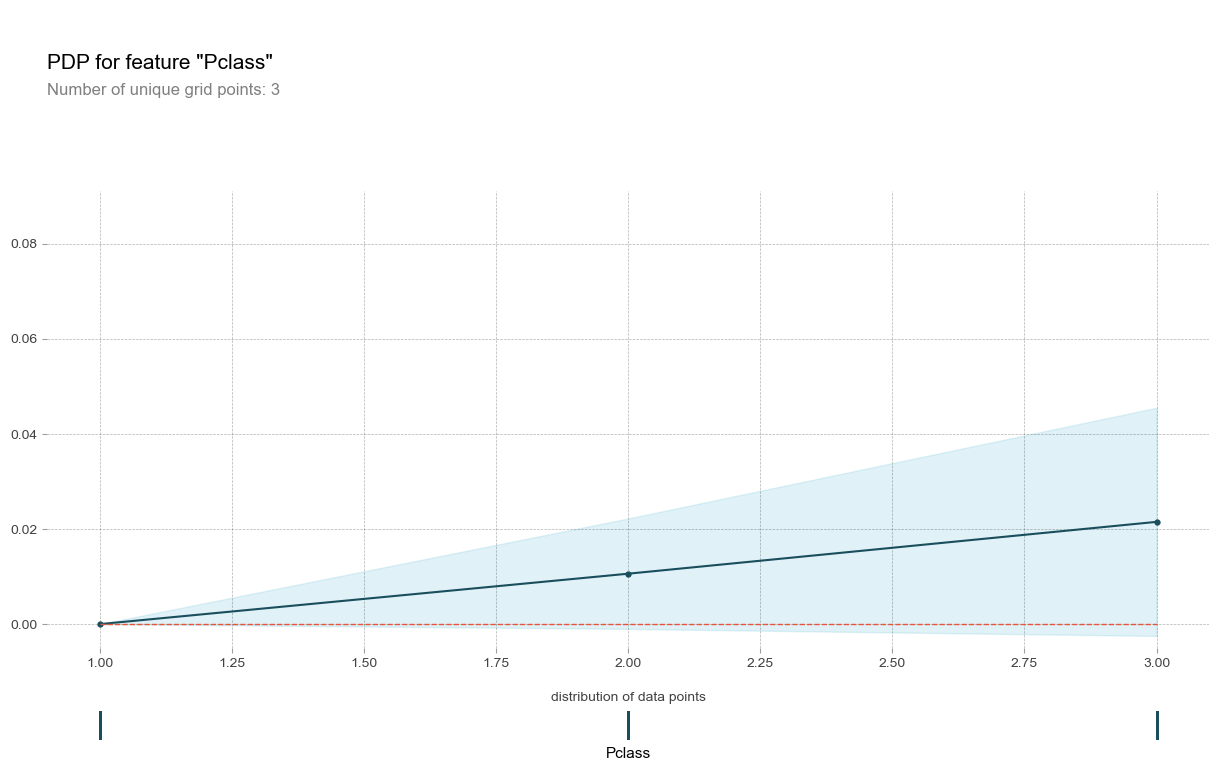

In [23]:
# Create the data that we will plot
pdp_Survive = pdp.pdp_isolate(model=BB2_model, dataset=val_X, model_features=feature_names, feature='Pclass')
# plot it
pdp.pdp_plot(pdp_Survive, 'Pclass', plot_pts_dist=True)
plt.show()


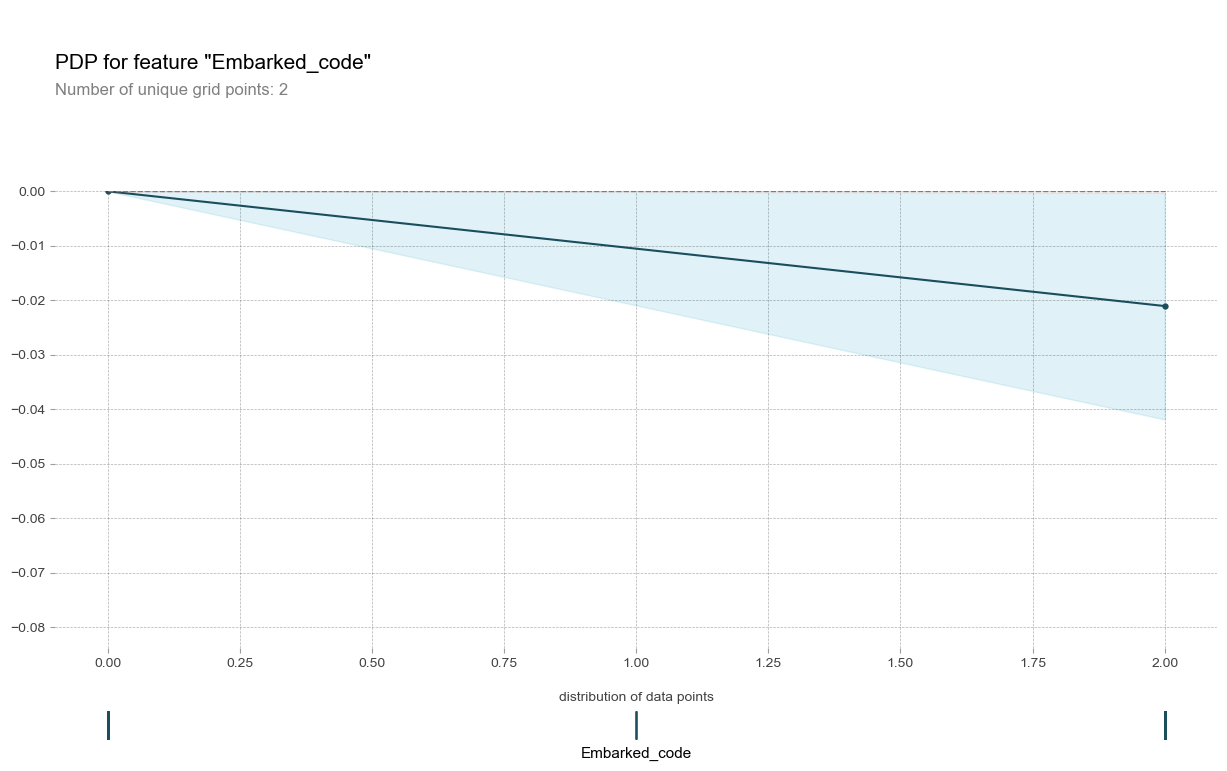

In [24]:
# Create the data that we will plot
pdp_Survive = pdp.pdp_isolate(model=BB2_model, dataset=val_X, model_features=feature_names, feature='Embarked_code')
# plot it
pdp.pdp_plot(pdp_Survive, 'Embarked_code', plot_pts_dist=True)
plt.show()


<h1>2. Critical Analysis, Reflection & Discussion</h1>

- From your observations is it true to say that an increase in model complexity improves performance?
> It doesn't, some models perform worse with increased complexity.

- For each of three models write a short explanation of what were the key factors in predicting survival
> Tree model - Sex code, Pclass and Age.

> Blackbox-1 model - Sex code, Pclass and Age.

> Blackbox-2 model - Fare, Sex code SbSip.

- For the explanations above, which of the two black box inspection techniques offered the most interpretable information and why?
> In my opinion, Permutation Importance is the better inspection technique here simply because after randomly permuting a feature, change in evaluation metric clearly indicates importance of that metric. Since it is just a change in score, it is inherently interpretable. High change means more dependence and vice versa.

- For this task what is the impact of the model chosen
    - specifically regarding performance of prediction
    > In this study black box model 1 (randomforest) performed better than the other two models, with higher f1 score and accuracy with significantly lower false negatives where is second black box model (multilinear perceptron) performed the worst, lower f1 and accuracy with significantly higher false positives and lower true negatives.
    - explanation of the key factors that predict survival
    > Sex code, Pclass and age were the key factors - indicating women and childern with better passenger class were most likely to be put on the boat first.

- Compare and contrast the insights and interpretability provided by:
    - the explainable model vs Black box models
    > With explainable model (decision tree) it is easy to see the decision or factors or rules model learned in order to make its classifications. It is inherently interpretable and natural as these can be read and understood in natural language. However, the black box models have a deep problem with interpretability, only the features can be studied to understand why these models are performing the way they are.
    - the two different approaches to explaining the black box models
    > In case of permutation importance, a change in model score would immediately imply what features are important or at least considered important by the model giving some insight into the problem, however, in partial differential plot, we fix a value in a feature for all samples and then vary it, while it provides more fidelity than PI, it is not as interpretable.

- How do the three explaintion methods fair in the following criteria for an interpretable model:
    - Accuracy
    > Black box model 1 performs the best, followed by transparent model - however both are pretty close to each other. Black box model 2 performs the worst.
    - Fidelity
    > Again, the BBM1 has the highest fidelity followed by TM and BBM2 at last.
